# Simple CNN with PyTorch

## JIANG Feiyu (UID: 3035770800)

In this notebook example, we will walk through how to train a simple CNN to classify images.

We will rely on the following modules, including torch and torchvision.

## Assignment requirement:

### This is a coding assignment, where you will be guided through implementing a simple CNN for hand-written digit classification, and train the model by yourself with Google Colab.

### Please submit a .zip file consisting of the following: (1) the ipynb file with your code, and (2) a PDF file consisting of the screenshots of the outcomes and results when running the ipynb file in Google Colab.

### Installation & Environment Setting
- Verify You Have a CUDA-Capable GPU:
```
control /name Microsoft.DeviceManager
```
You can verify that you have a CUDA-capable GPU through the Display Adapters section in the Windows Device Manager. Here you will find the vendor name and model of your graphics card(s). If you have an NVIDIA card that is listed in https://developer.nvidia.com/cuda-gpus, that GPU is CUDA-capable.

- Run on `Colab`
  Difference: Jupyter Notebook 是一种交互式计算环境,它允许用户创建和共享包含代码、文本和可视化内容的文档。Colab 是 Google 提供的一种基于云的 Jupyter Notebook 环境。Colab 提供了一个免费的云计算平台，用户可以在其中创建和运行 Jupyter Notebook。Colab 提供了一些额外的功能和资源，比如：
  - 免费的 GPU 和 TPU 资源，用于加速计算、深度学习等任务；
  - 与 Google Drive 的集成，可以轻松加载和保存数据文件；
  - 预装了许多常见的 Python 库和工具。
- 在Colab中启动GPU: `修改->笔记本设置->GPU`

- Now install the pytorch:
```
> python --version
Python 3.11.4
> conda --version
conda 23.7.2
> conda install pytorch torchvision torchaudio cpuonly -c pytorch
Proceed ([y]/n)? y
> pip install torch
> pip install torchtext
> pip install torchvision

```

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

## 1. Data Loader

The first step is to create a data loader.

A data loader can be treated as a list (or iterator, technically). Each time it will provide a minibatch of (img, label) pairs.

Please wait till the number "2" apppears in the left "In[ ]" for the data to be fully downloaded, or execute this part again to see "Files already downloaded and verified".

In [2]:
# Choose a dataset -- MNIST for example
dataset = datasets.MNIST(root='data', train=True, download=True)

# Set how the input images will be transformed
dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1307,], std=[0.3081,])
])

# Create a data loader
batch_size = 256
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1)

# Show the shape of a batch.
print("The shape of one batch is {}".format((next(iter(train_loader)))[0].size()))

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

100%|██████████| 9912422/9912422 [00:00<00:00, 108162200.84it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26033890.79it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27251307.80it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21333178.91it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

The shape of one batch is torch.Size([256, 1, 28, 28])


### Now to show some images for fun

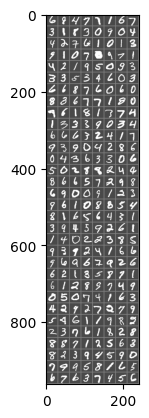

In [3]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(0, 10)))

## 2. Model

The second step is to define our model. This part is left to be filled by yourself.

The way to define a model can be found at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py).

The __requirements__ are as the following:

* Define the first convolutional layer with channel size = 5, kernel size = 3 and stride = 2, padding = 1.
* Define the second convolutional layer with channel size = 8, kernel size = 3 and stride = 1, padding = 1.
* Use max pooling layer with stride = 2 between the two convolution layers.
* Define the FC layer(s) and finally return a tensor with shape torch.Size([256, 10]). (Use torch.view to reshape tensors. You can try any number of FC layers).
* Use ReLU activation between any two layers.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

"""
Define the Model. The requirements are:
Define the first convolutional layer with channel size = 5, kernel size = 3 and stride = 2, padding = 1.
Define the second convolutional layer with channel size = 8, kernel size = 3 and stride = 1, padding = 1.
Use max pooling layer with stride = 2 between the two convolution layers.
Define the FC layer(s) and finally return a tensor with shape torch.Size([256, 10]). (Use torch.view to reshape tensors. You can try any number of FC layers).
Use ReLU activation between any two layers.
"""

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()  # Call parent class's constructor
        # define the convonlutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, stride=2, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(in_channels=5, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.fc1 = nn.Linear(7 * 7 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()


    def forward(self, y):
      y = self.pool(self.relu1(self.conv1(y)))
      y = self.relu2(self.conv2(y))
      y = y.view(y.size(0), -1)
      y = F.relu(self.fc1(y))
      y = self.fc2(y)
      return y


model = SimpleCNN() # You may change 'device' here !!! <- please see code below
#
#
#

6     8     4     7     7     1     6     7     3     1    


## 3. Loss and Optimizer

The third step is to define the loss function and the optimization algorithm.

* Define the __criterion__ to be Cross Entropy Loss.
* Define the __optimizer__ to be SGD with momentum factor 0.9 and weight_decay 5e-4.

Information can be found at PyTorch documents.

In [5]:
#############################################################################
# TODO: Define the criterion to be Cross Entropy Loss.                      #
#       Define the optimizer to be SGD with momentum factor 0.9             #
#       and weight_decay 5e-4.
# You may change the learning rate.                                      #
#############################################################################
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.007, momentum=0.9, weight_decay=5e-4)


#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

## 4. Start training

The next step is to start the training process.

In [6]:
def train(epoch):

    model.train()  # Set the model to be in training mode
    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        # You may change 'device' of inputs here !!!
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        if batch_index % 10 == 0:
            print('epoch {}  batch {}/{}  loss {:.3f}'.format(
                epoch, batch_index, len(train_loader), loss.item()))

        # Backward
        optimizer.zero_grad()  # Set parameter gradients to zero
        loss.backward()        # Compute (or accumulate, actually) parameter gradients
        optimizer.step()       # Update the parameters



In [23]:
def train_newmodel(newmodel, epoch):

    newmodel.train()  # Set the model to be in training mode
    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        # You may change 'device' of inputs here !!!
        inputs, targets = inputs.to('cuda'), targets.to('cuda')
        outputs = newmodel(inputs)
        loss = criterion(outputs, targets)
        if batch_index % 10 == 0:
            print('epoch {}  batch {}/{}  loss {:.3f}'.format(
                epoch, batch_index, len(train_loader), loss.item()))

        # Backward
        optimizer.zero_grad()  # Set parameter gradients to zero
        loss.backward()        # Compute (or accumulate, actually) parameter gradients
        optimizer.step()       # Update the parameters


In [7]:
# Choose a dataset -- MNIST for example
dataset = datasets.MNIST(root='data', train=False, download=True)

# Set how the input images will be transformed
dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1307, ], std=[0.3081, ])
])

# Create a data loader
test_dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=1)

def test(dataloader):
    model.eval()

    # Evaluate your model on the test dataset
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, -1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print the accuracy and loss
    accuracy = correct / total
    print('Accuracy:', accuracy)

In [8]:
for epoch in range(0, 6):
    train(epoch)
    mat2_fc1_shape = model.fc1.weight.shape
    mat2_fc2_shape = model.fc2.weight.shape
    # You may validate model here

epoch 0  batch 0/235  loss 2.300
epoch 0  batch 10/235  loss 2.297
epoch 0  batch 20/235  loss 2.289
epoch 0  batch 30/235  loss 2.273
epoch 0  batch 40/235  loss 2.264
epoch 0  batch 50/235  loss 2.249
epoch 0  batch 60/235  loss 2.209
epoch 0  batch 70/235  loss 2.148
epoch 0  batch 80/235  loss 1.964
epoch 0  batch 90/235  loss 1.696
epoch 0  batch 100/235  loss 1.108
epoch 0  batch 110/235  loss 0.845
epoch 0  batch 120/235  loss 0.691
epoch 0  batch 130/235  loss 0.567
epoch 0  batch 140/235  loss 0.628
epoch 0  batch 150/235  loss 0.590
epoch 0  batch 160/235  loss 0.495
epoch 0  batch 170/235  loss 0.418
epoch 0  batch 180/235  loss 0.540
epoch 0  batch 190/235  loss 0.361
epoch 0  batch 200/235  loss 0.415
epoch 0  batch 210/235  loss 0.379
epoch 0  batch 220/235  loss 0.307
epoch 0  batch 230/235  loss 0.405
epoch 1  batch 0/235  loss 0.365
epoch 1  batch 10/235  loss 0.386
epoch 1  batch 20/235  loss 0.361
epoch 1  batch 30/235  loss 0.309
epoch 1  batch 40/235  loss 0.319
ep

## Quickly save the model

In [9]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

## 5. What's next?

We have sketched a simple framework for training CNNs. There are a few more functions yet to be completed.

  - Use gpu and cudnn
  - Do validation after each epoch
  - Adjust the learning rate

Please read the ppt carefully in class.

### Check if GPU is available

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda:0


### Create a test dataset

The shape of one test batch is torch.Size([64, 1, 28, 28])


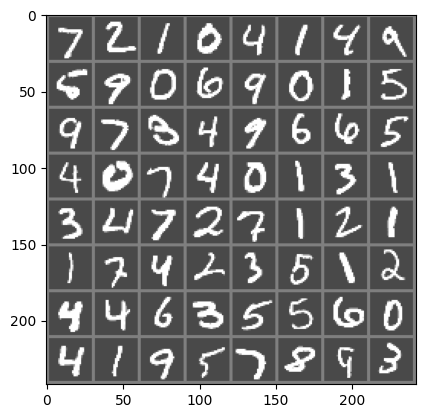

In [11]:
# Choose a dataset -- MNIST for example
test_dataset = datasets.MNIST(root='data', train=False, download=True)

# Initialize a list to store misclassified images
misclassified_images = []

# Set how the input images will be transformed
test_dataset.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1307,], std=[0.3081,])
])

# Create a data loader for testing
test_batch_size = 64  # You can choose an appropriate batch size
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, num_workers=1)

# Print the shape of one batch from the test loader
print("The shape of one test batch is {}".format(next(iter(test_loader))[0].size()))

# Get some random testing images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Convert labels to a list
labels_list = labels.tolist()

### Move both data, model and images to GPU

In [12]:
# Load the pre-trained model
CNNmodel = SimpleCNN()
CNNmodel.load_state_dict(torch.load(PATH))
CNNmodel.to(device) # Move the model to GPU
CNNmodel.eval()

# Initialize variables to store predictions and ground truth
all_predictions = []
all_ground_truth = []

# Move images to the GPU
images = images.to(device)

### Check the prediction and do validation

In [13]:
# Iterate through the test data
for images, labels in test_loader:
    images = images.to(device)  # Move data to the GPU
    labels = labels.tolist()   # Convert labels to a list

    # Make predictions on the test images
    with torch.no_grad():
        outputs = CNNmodel(images)

    _, predicted = torch.max(outputs, 1)

    # Append to the lists
    all_predictions.extend(predicted.tolist())
    all_ground_truth.extend(labels)

# Print the predicted labels
print('Predicted: ', ' '.join(f'{classes[all_predictions[j]]:5s}' for j in range(len(all_predictions))))

# Print the ground truth labels
print('GroundTruth: ', ' '.join(f'{classes[all_ground_truth[j]]:5s}' for j in range(len(all_ground_truth))))

# Calculate accuracy
correct_predictions = sum(1 for p, gt in zip(all_predictions, all_ground_truth) if p == gt)
accuracy = correct_predictions / len(all_ground_truth) * 100

# Print accuracy
print(f'Accuracy: {accuracy:.2f}%')

Predicted:  7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     9     3     7     4     6     4     3     0     7     0     2     9     1     7     3     2     9     7     7     6     2     7     8     4     7     3     6     1     3     6     4     3     1     4     1     7     6     9     6     0     5     4     9     9     2     1     9     4     8     7     3     9     7     9     4     4     9     2     5     4     7     6     4     9     0     5     8     5     6     6     5     7     8     1     0     1     6     4     6     7     3     1     7     1     8     2     0     2     9     9     5     5     1     5     6     0     3     4     4     6     5     4     6   

### Adjust the learning rate

epoch 0  batch 0/235  loss 2.291
epoch 0  batch 10/235  loss 2.350
epoch 0  batch 20/235  loss 2.308
epoch 0  batch 30/235  loss 2.305
epoch 0  batch 40/235  loss 2.304
epoch 0  batch 50/235  loss 2.305
epoch 0  batch 60/235  loss 2.315
epoch 0  batch 70/235  loss 2.318
epoch 0  batch 80/235  loss 2.307
epoch 0  batch 90/235  loss 2.326
epoch 0  batch 100/235  loss 2.334
epoch 0  batch 110/235  loss 2.323
epoch 0  batch 120/235  loss 2.315
epoch 0  batch 130/235  loss 2.307
epoch 0  batch 140/235  loss 2.297
epoch 0  batch 150/235  loss 2.319
epoch 0  batch 160/235  loss 2.326
epoch 0  batch 170/235  loss 2.303
epoch 0  batch 180/235  loss 2.312
epoch 0  batch 190/235  loss 2.306
epoch 0  batch 200/235  loss 2.316
epoch 0  batch 210/235  loss 2.333
epoch 0  batch 220/235  loss 2.325
epoch 0  batch 230/235  loss 2.312
epoch 1  batch 0/235  loss 2.318
epoch 1  batch 10/235  loss 2.310
epoch 1  batch 20/235  loss 2.295
epoch 1  batch 30/235  loss 2.304
epoch 1  batch 40/235  loss 2.310
ep

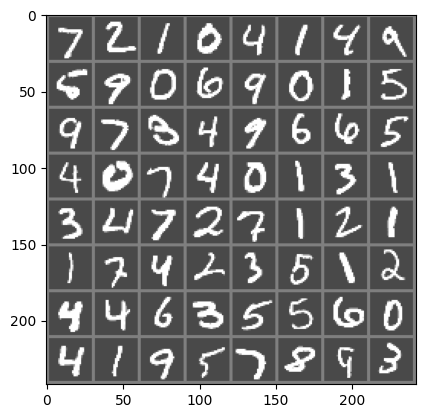

Predicted:  9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9     9   

In [25]:
import torch.optim as optim

newModel = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(newModel.parameters(), lr=0.9, momentum=0.9, weight_decay=5e-4) # change learning rate to 0.009

for epoch in range(0, 6):
    train_newmodel(newModel, epoch)
    mat2_fc1_shape = newModel.fc1.weight.shape
    mat2_fc2_shape = newModel.fc2.weight.shape
    # You may validate newModel here

# Choose a dataset -- MNIST for example
test_dataset_1 = datasets.MNIST(root='data', train=False, download=True)

# Initialize a list to store misclassified images
misclassified_images = []

# Set how the input images will be transformed
test_dataset_1.transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1307,], std=[0.3081,])
])

# Create a data loader for testing
test_batch_size = 64  # You can choose an appropriate batch size
test_loader = DataLoader(test_dataset_1, batch_size=test_batch_size, shuffle=False, num_workers=1)

# Print the shape of one batch from the test loader
print("The shape of one test batch is {}".format(next(iter(test_loader))[0].size()))

# Get some random testing images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Convert labels to a list
labels_list = labels.tolist()

# Initialize variables to store predictions and ground truth
all_predictions = []
all_ground_truth = []

# Move images to the GPU
images = images.to(device)

# Iterate through the test data
for images, labels in test_loader:
    images = images.to(device)  # Move data to the GPU
    labels = labels.tolist()   # Convert labels to a list

    # Make predictions on the test images
    with torch.no_grad():
        outputs = newModel(images)

    _, predicted = torch.max(outputs, 1)

    # Append to the lists
    all_predictions.extend(predicted.tolist())
    all_ground_truth.extend(labels)

# Print the predicted labels
print('Predicted: ', ' '.join(f'{classes[all_predictions[j]]:5s}' for j in range(len(all_predictions))))

# Print the ground truth labels
print('GroundTruth: ', ' '.join(f'{classes[all_ground_truth[j]]:5s}' for j in range(len(all_ground_truth))))

# Calculate accuracy
correct_predictions = sum(1 for p, gt in zip(all_predictions, all_ground_truth) if p == gt)
accuracy = correct_predictions / len(all_ground_truth) * 100

# Print accuracy
print(f'Accuracy: {accuracy:.2f}%')